# <font face = 'Impact' color = '#FFAEBC' > Getting Ready with our Second Mini-Project <font/>
#### <font face = 'Times New Roman' color = '#A16AE8'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
In this notebook, we will be importing packages and use them to load and explore data sets. We will be using the pandas package to load datasets and qdesc to explore both categorical and numerical variables. Functions to be used include pd.read_excel, pd.read_csv, head, qd.desc, qd.normcheck_dashboard, qd.freqdist_a, and qd.freqdist_to_excel.

# <font face = 'Impact' color = '#FFAEBC' > Exploring Sleep Hours during Weeknights <font/> 

In [1]:
# Importing the necessary packages for us to use certain functions.
import pandas as pd
import numpy as np
import qdesc as qd
import researchpy as rp

In [2]:
# Loading a data set and storing it into a variable.
df1 = pd.read_excel("SleepData.xlsx")
# Checking the first three rows of the data set.
df1.head(5)

Sex  Age MaritalStatus Employment  sleep(hrs)/weeknights
0    Male   30        Single  Permanent                   8.85
1  Female   58       Married  Permanent                   8.76
2  Female   60        Single  Permanent                   8.49
3    Male   43        Single  Permanent                   8.85
4  Female   43        Single  Permanent                   8.73

In [3]:
# Default way of doing descriptives in python.
df1.describe().T

count       mean        std    min     25%    50%  \
Age                    671.0  49.804769  19.360809  18.00  33.000  49.00   
sleep(hrs)/weeknights  671.0   7.626021   1.390674   4.52   6.255   8.34   

                          75%    max  
Age                    66.500  84.00  
sleep(hrs)/weeknights   8.885   9.88

In [4]:
# Using the desc function from the qdesc package to perform descriptive analysis.
qd.desc(df1)

count   mean    std  median    MAD    min    max  \
Age                    671.0  49.80  19.36   49.00  17.00  18.00  84.00   
sleep(hrs)/weeknights  671.0   7.63   1.39    8.34   0.98   4.52   9.88   

                       AD_stat  5% crit_value  
Age                       7.38           0.78  
sleep(hrs)/weeknights    35.70           0.78

In [5]:
# Saving our results to a spreadsheet file.
res = qd.desc(df1)
res.to_excel("SleepDescriptives.xlsx")

In [6]:
# Generate descriptive analysis for sleep hours when grouped by sex.
qd.grp_desc(df1, 'sleep(hrs)/weeknights', 'Sex')

Sex  count  mean   std  median   mad   min   max  AD_stat  crit_5%
0  Female    350  7.67  1.36    8.33  0.96  4.52  9.88    17.14     0.78
1    Male    321  7.57  1.43    8.36  0.99  4.66  9.64    18.70     0.78

In [7]:
# Generate descriptive analysis for sleep hours when grouped by employment.
qd.grp_desc(df1, 'sleep(hrs)/weeknights', 'Employment')

Employment  count  mean   std  median   mad   min   max  AD_stat  crit_5%
0     Permanent    352  8.87  0.32    8.86  0.22  7.96  9.88     0.15     0.78
1  Probationary    319  6.26  0.60    6.22  0.40  4.52  7.90     0.36     0.78

In [8]:
# Generate descriptive analysis for sleep hours when grouped by marital status.
qd.grp_desc(df1, 'sleep(hrs)/weeknights', 'MaritalStatus')

MaritalStatus  count  mean   std  median   mad   min   max  AD_stat  crit_5%
0       Married    333  7.67  1.40    8.44  0.88  4.66  9.64    19.32     0.78
1        Single    338  7.58  1.39    8.26  1.01  4.52  9.88    16.56     0.78


--- Variable: Age ---
  Anderson-Darling Statistic : 7.3813
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


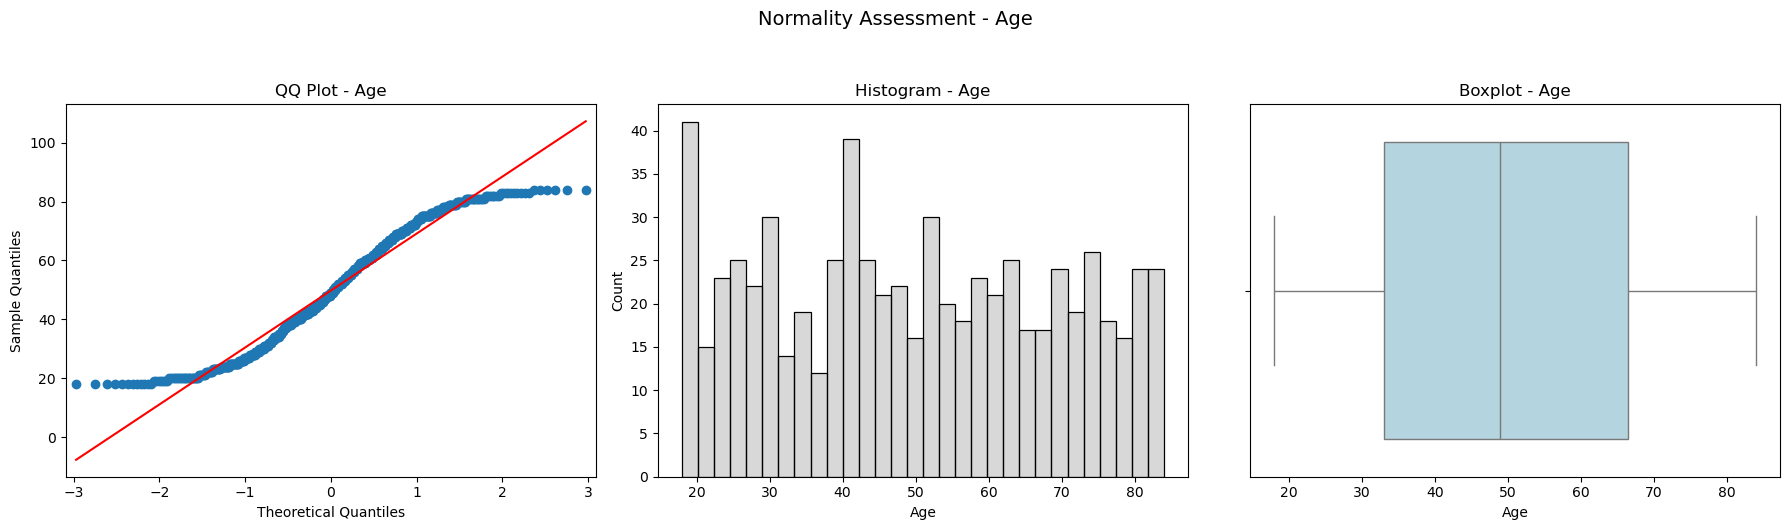


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 35.6977
  Critical Value (@ 5.0%) : 0.7820
  Decision : Reject Null


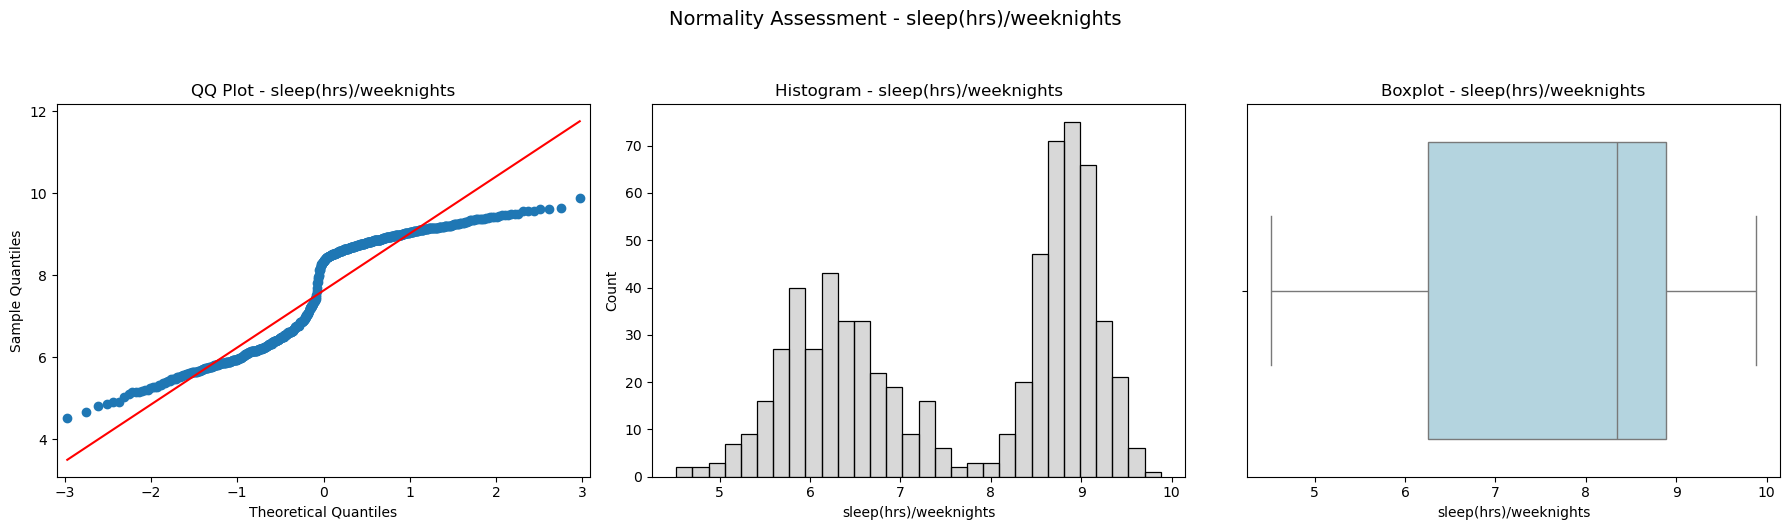

In [9]:
# Using the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(df1)

In [10]:
# Slicing the data frame to have a subset data for marital status.
Single = df1[df1['MaritalStatus'] == 'Single'] # Slicing the data frame to only include the single.
Single.head() # checking out the data subset.

Sex  Age MaritalStatus Employment  sleep(hrs)/weeknights
0    Male   30        Single  Permanent                   8.85
2  Female   60        Single  Permanent                   8.49
3    Male   43        Single  Permanent                   8.85
4  Female   43        Single  Permanent                   8.73
6    Male   45        Single  Permanent                   8.36

In [11]:
# Confirming that the subset would only include those who are single.
np.unique(Single.MaritalStatus)

array(['Single'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 3.0459
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


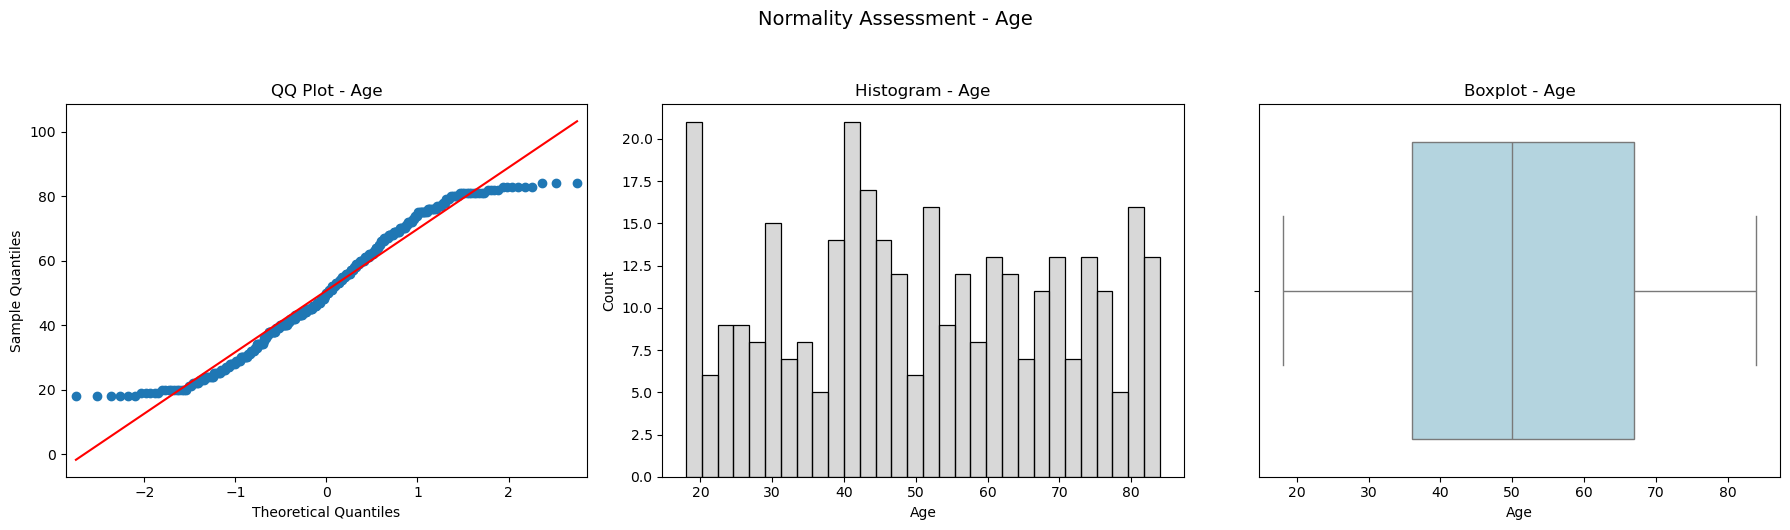


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 16.5637
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


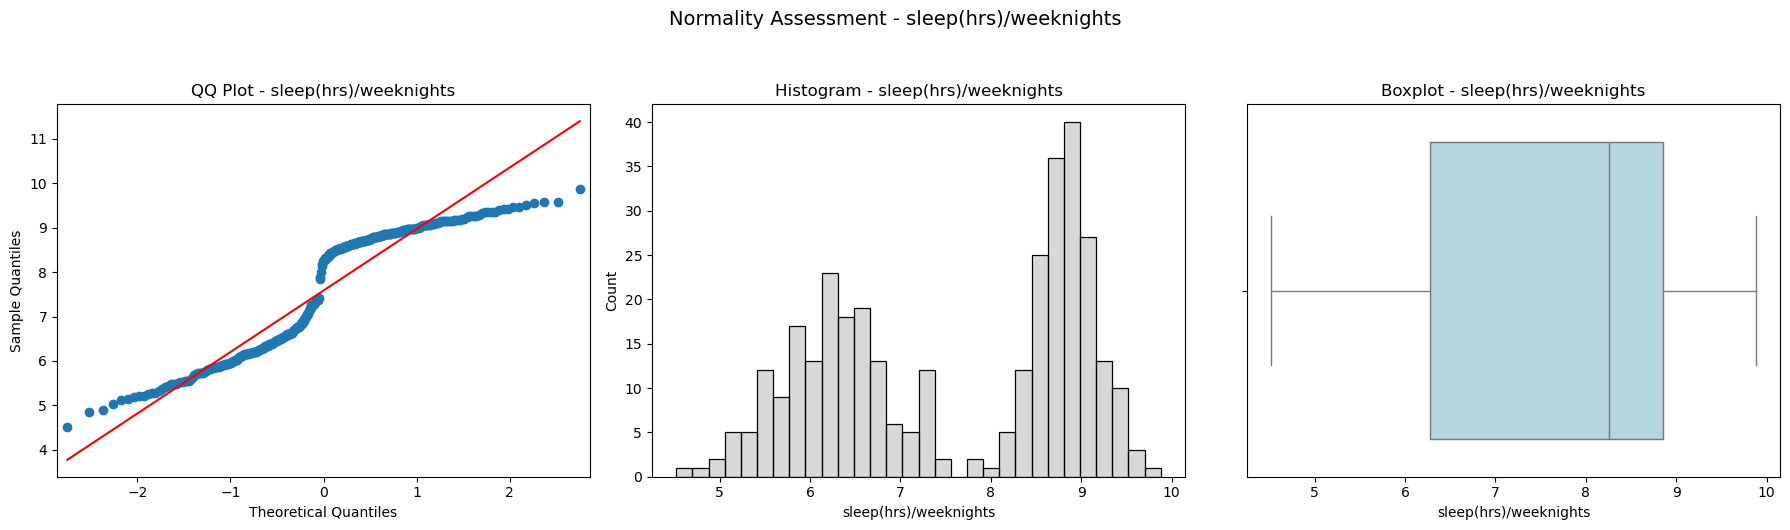

In [12]:
# Using the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(Single)

In [13]:
# Slicing the data frame to have a subset data for married.
Married = df1[df1['MaritalStatus'] == 'Married'] # Slicing the data frame to only include the married.
Married.head() # checking out the data subset.

Sex  Age MaritalStatus Employment  sleep(hrs)/weeknights
1   Female   58       Married  Permanent                   8.76
5   Female   32       Married  Permanent                   8.70
10  Female   29       Married  Permanent                   9.05
11  Female   31       Married  Permanent                   9.41
12    Male   38       Married  Permanent                   8.94

In [14]:
# Confirming that the subset is all married.
np.unique(Married.MaritalStatus)

array(['Married'], dtype=object)


--- Variable: Age ---
  Anderson-Darling Statistic : 4.7098
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


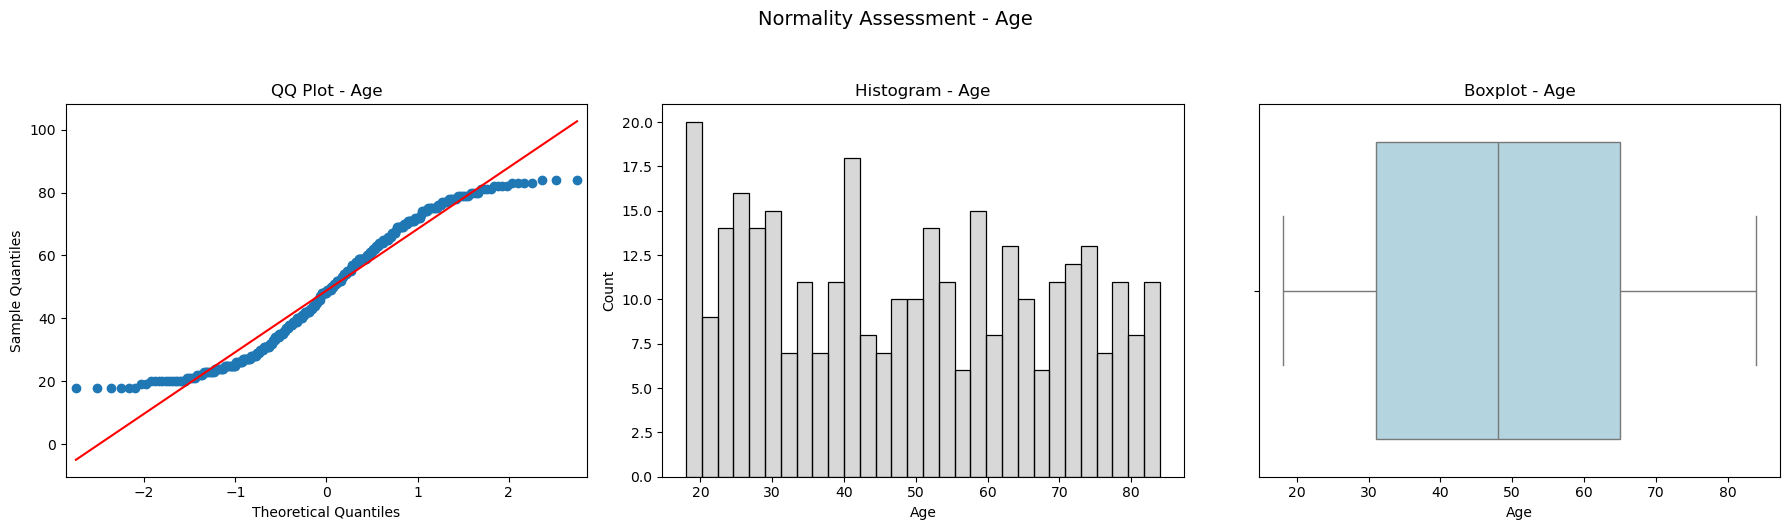


--- Variable: sleep(hrs)/weeknights ---
  Anderson-Darling Statistic : 19.3198
  Critical Value (@ 5.0%) : 0.7780
  Decision : Reject Null


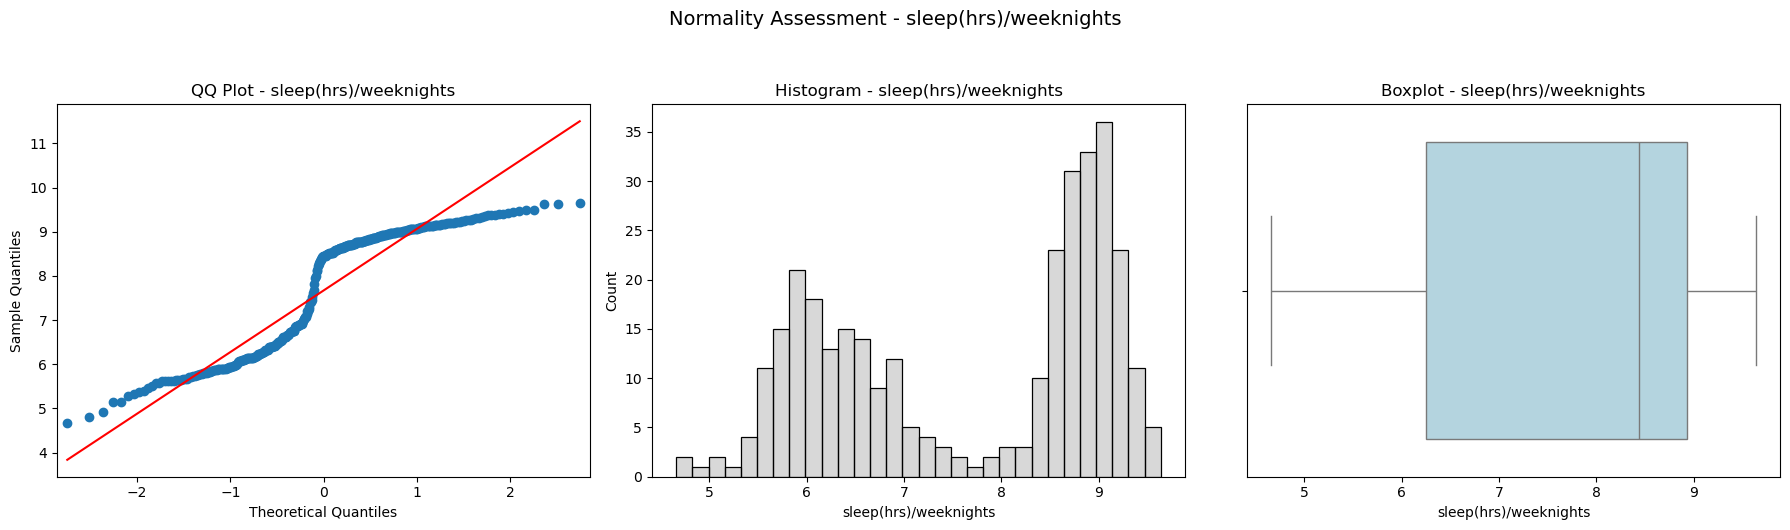

In [15]:
# Using the desc function from the qdesc package to explore the data for assumption of normality.
qd.normcheck_dashboard(Married)

In [16]:
# Generating a frequency distribution for a specified variable: Sex
qd.freqdist(df1, 'Sex')

Sex  Count  Percentage
0  Female    350   52.160954
1    Male    321   47.839046

In [17]:
# Generating a frequency distribution for a specified variable: Employment
qd.freqdist(df1, 'Employment')

Employment  Count  Percentage
0     Permanent    352   52.459016
1  Probationary    319   47.540984

In [18]:
# Generating a frequency distribution for a specified variable: Marital Status
qd.freqdist(df1, 'MaritalStatus')

MaritalStatus  Count  Percentage
0        Single    338   50.372578
1       Married    333   49.627422

In [19]:
# Generating a frequency distribution for all the categorical features from the said data frame.
qd.freqdist_a(df1)

Column         Value  Count  Percentage
0            Sex        Female    350   52.160954
1            Sex          Male    321   47.839046
2  MaritalStatus        Single    338   50.372578
3  MaritalStatus       Married    333   49.627422
4     Employment     Permanent    352   52.459016
5     Employment  Probationary    319   47.540984

In [20]:
# Generating a frequency distribution but this time have it store in an excel file and organized
# on a per sheet basis per categorical feature.
qd.freqdist_to_excel(df1, "SleepCategorical.xlsx")

Frequency distributions written to SleepCategorical.xlsx
